In [40]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [41]:
with open("../Data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [42]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
191995,187,1314,BUG,SKELETON,7,15,999
191996,1438,1433,TAXI,TAPE,8,15,999
191997,1537,1489,UNDERWEAR,TOWEL,9,15,999
191998,386,283,COUCH,CHAUFFEUR,10,15,999


In [43]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
127995,947,NEUTRON,402,11,0,15,999
127996,467,DINER,1441,2,1,15,999
127997,1444,TEENAGER,1014,4,0,15,999
127998,1489,TOWEL,1537,9,1,15,999


### Run CMR-IA

In [44]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [45]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.1,
    beta_cue = 0.5,
    beta_distract = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.4,  
    gamma_cf = 0.6,  # cf - fc Higher, ILI +1 Higher
    s_fc = 0.2,
    s_cf = 0.2,
    c_thresh = 0.01,
    kappa = 0.08,
    lamb = 0.04,
    eta = 0.02,
    omega = 5,  # this is important for increasing PLI num
    alpha = 1,
    phi_s = 0.5,
    phi_d = 0.5,
    nitems_in_accumulator = 48,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.1,
 'beta_cue': 0.5,
 'beta_rec_post': 0.1,
 'beta_distract': 0.1,
 'phi_s': 0.5,
 'phi_d': 0.5,
 's_cf': 0.2,
 's_fc': 0.2,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0.8,
 'lamb': 0.04,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.4,
 'gamma_cf': 0.6}

In [46]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 509.49163246154785


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,823.0,1810.0,0.852134
1,0,0,1347,1051.0,1790.0,0.795432
2,0,0,413,524.0,2160.0,0.845137
3,0,0,812,1323.0,2100.0,0.798681
4,0,0,110,879.0,1890.0,0.704490
...,...,...,...,...,...,...
127995,15,999,947,402.0,2790.0,0.835134
127996,15,999,467,-1.0,-1.0,-1.000000
127997,15,999,1444,-1.0,-1.0,-1.000000
127998,15,999,1489,-1.0,-1.0,-1.000000


In [47]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,823.0,1810.0,0.852134,CLIPPERS,823,9,1,True
1,0,0,1347,1051.0,1790.0,0.795432,SPARROW,1051,8,1,True
2,0,0,413,524.0,2160.0,0.845137,CROSS,524,7,0,True
3,0,0,812,1323.0,2100.0,0.798681,LEOPARD,1323,5,0,True
4,0,0,110,879.0,1890.0,0.704490,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,2790.0,0.835134,NEUTRON,402,11,0,True
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False
127998,15,999,1489,-1.0,-1.0,-1.000000,TOWEL,1537,9,1,False


In [48]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,823.0,1810.0,0.852134,CLIPPERS,823,9,1,True,0.0,9.0
1,0,0,1347,1051.0,1790.0,0.795432,SPARROW,1051,8,1,True,0.0,8.0
2,0,0,413,524.0,2160.0,0.845137,CROSS,524,7,0,True,0.0,7.0
3,0,0,812,1323.0,2100.0,0.798681,LEOPARD,1323,5,0,True,0.0,5.0
4,0,0,110,879.0,1890.0,0.704490,BED,1083,0,0,False,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,2790.0,0.835134,NEUTRON,402,11,0,True,15.0,11.0
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN
127998,15,999,1489,-1.0,-1.0,-1.000000,TOWEL,1537,9,1,False,NaN,NaN


In [49]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,823.0,1810.0,0.852134,CLIPPERS,823,9,1,True,0.0,9.0,0.0,0.0,Correct
1,0,0,1347,1051.0,1790.0,0.795432,SPARROW,1051,8,1,True,0.0,8.0,0.0,0.0,Correct
2,0,0,413,524.0,2160.0,0.845137,CROSS,524,7,0,True,0.0,7.0,0.0,0.0,Correct
3,0,0,812,1323.0,2100.0,0.798681,LEOPARD,1323,5,0,True,0.0,5.0,0.0,0.0,Correct
4,0,0,110,879.0,1890.0,0.704490,BED,1083,0,0,False,0.0,6.0,0.0,6.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,2790.0,0.835134,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN,NaN,NaN,NoResp
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,-1.0,-1.0,-1.000000,TOWEL,1537,9,1,False,NaN,NaN,NaN,NaN,NoResp


In [50]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,232.0,1910.0,0.712670,PUMP,1248,10,1,False,1.0,9.0,0.0,-1.0,ILI
9,1,0,1540,1248.0,1960.0,0.756585,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
10,1,0,528,1590.0,1580.0,0.844352,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1534.0,3320.0,0.815753,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,396.0,2540.0,0.810804,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,2790.0,0.835134,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN,NaN,NaN,NoResp
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,-1.0,-1.0,-1.000000,TOWEL,1537,9,1,False,NaN,NaN,NaN,NaN,NoResp


In [51]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,232.0,1910.0,0.712670,PUMP,1248,10,1,False,1.0,9.0,0.0,-1.0,ILI
9,1,0,1540,1248.0,1960.0,0.756585,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
10,1,0,528,1590.0,1580.0,0.844352,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1534.0,3320.0,0.815753,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,396.0,2540.0,0.810804,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
13,1,0,586,1446.0,1110.0,0.855385,FLY,1446,4,1,True,1.0,4.0,0.0,0.0,Correct
14,1,0,1093,35.0,1400.0,0.847740,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,1119.0,2220.0,0.556912,GROUND,456,3,0,False,1.0,0.0,0.0,-3.0,ILI
16,2,0,173,414.0,2140.0,0.885530,BRIDE,414,10,0,True,2.0,10.0,0.0,0.0,Correct
17,2,0,492,845.0,2820.0,0.848753,DRAGON,845,11,0,True,2.0,11.0,0.0,0.0,Correct


In [52]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    57241
ILI        40089
NoResp     20797
PLI         1873
Name: list, dtype: int64

In [53]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.4770083333333333

In [54]:
np.array(f_in).shape

(1000, 128, 384)

In [55]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [56]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [57]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [58]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLOT

In [59]:
df_PLI = df_simu.query("intrusion_type == 'PLI' and list > 5")
# df_PLI = df_simu.query("intrusion_type == 'PLI'")
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-14.0,1,14.0,0.000704
1,-13.0,5,13.0,0.003519
2,-12.0,5,12.0,0.003519
3,-11.0,18,11.0,0.012667
4,-10.0,28,10.0,0.019704
5,-9.0,33,9.0,0.023223
6,-8.0,47,8.0,0.033075
7,-7.0,67,7.0,0.047150
8,-6.0,86,6.0,0.060521
9,-5.0,113,5.0,0.079521


In [60]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
224,12,1,7,1120.0,3070.0,0.537869,ADOLESCENT,1483,8,0,False,8.0,1.0,-4.0,-7.0,PLI
225,12,1,96,93.0,3340.0,0.584613,BASKETBALL,432,7,1,False,9.0,0.0,-3.0,-7.0,PLI
238,13,1,1060,438.0,3100.0,0.646517,PICNIC,591,6,0,False,12.0,0.0,-1.0,-6.0,PLI
382,15,2,546,1449.0,3620.0,0.511683,EYELASH,1427,10,0,False,7.0,0.0,-8.0,-10.0,PLI
492,13,3,84,1181.0,3940.0,0.589886,BANKER,1401,10,1,False,12.0,0.0,-1.0,-10.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127735,14,997,260,1362.0,2440.0,0.649024,CATHEDRAL,886,6,0,False,10.0,2.0,-4.0,-4.0,PLI
127828,10,998,1111,712.0,3540.0,0.483602,PORTRAIT,1512,11,0,False,3.0,0.0,-7.0,-11.0,PLI
127837,11,998,456,874.0,3980.0,0.586876,DIAGRAM,48,11,0,False,8.0,0.0,-3.0,-11.0,PLI
127868,15,998,1458,262.0,3460.0,0.650038,THIMBLE,444,7,1,False,12.0,2.0,-3.0,-5.0,PLI


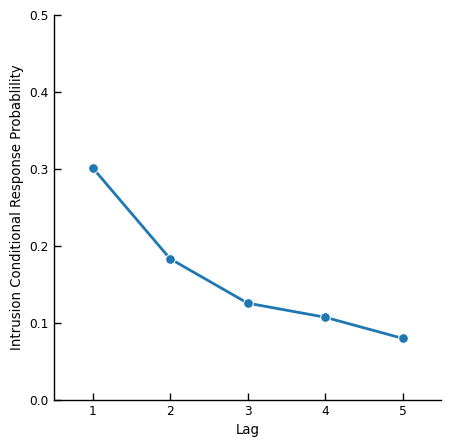

In [61]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
# plt.savefig('fig/simu7_PLI.pdf')
plt.show()

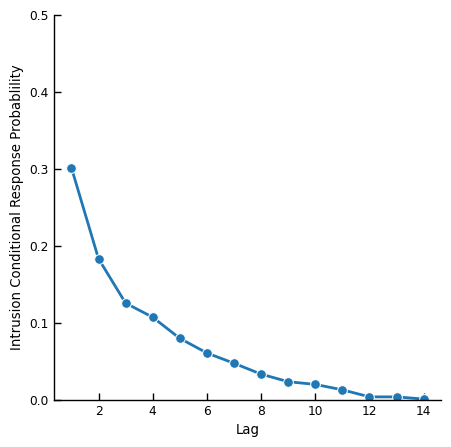

In [62]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp, x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
# plt.xlim([0.5,5.5])
# plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
# plt.savefig('fig/simu7_PLI.pdf')
plt.show()

In [63]:
df_ILI = df_simu.query("intrusion_type == 'ILI'")
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,232.0,1910.0,0.712670,PUMP,1248,10,1,False,1.0,9.0,0.0,-1.0,ILI
9,1,0,1540,1248.0,1960.0,0.756585,UNIVERSE,232,9,0,False,1.0,10.0,0.0,1.0,ILI
15,1,0,666,1119.0,2220.0,0.556912,GROUND,456,3,0,False,1.0,0.0,0.0,-3.0,ILI
20,2,0,1399,688.0,2220.0,0.671828,SUBURB,142,3,1,False,2.0,1.0,0.0,-2.0,ILI
21,2,0,1523,1636.0,2610.0,0.689461,TUSK,1117,7,0,False,2.0,1.0,0.0,-6.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127979,13,999,1589,1285.0,2010.0,0.606565,WARRIOR,922,3,1,False,13.0,0.0,0.0,-3.0,ILI
127981,13,999,393,1225.0,2880.0,0.593560,COW,171,4,1,False,13.0,0.0,0.0,-4.0,ILI
127984,14,999,136,480.0,3250.0,0.639192,BLENDER,527,7,0,False,14.0,0.0,0.0,-7.0,ILI
127990,14,999,480,1586.0,2410.0,0.701371,DOG,10,0,1,False,14.0,1.0,0.0,1.0,ILI


In [64]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1    -1.731218
2    -2.063962
3    -2.180611
4    -2.039594
5    -2.144274
6    -2.221449
7    -2.145695
8    -2.225079
9    -2.112138
10   -2.285181
11   -2.183379
12   -2.085923
13   -2.216564
14   -2.237094
15   -2.178979
Name: pos_lag, dtype: float64

In [65]:
possible_ILI_cnt = {}
for pair_pos in df_ILI.study_pos:
    l_bound = -pair_pos
    r_bound = 11 - pair_pos
    for i in np.arange(l_bound, r_bound + 1):
        if i in possible_ILI_cnt:
            possible_ILI_cnt[i] += 1
        else:
            possible_ILI_cnt[i] = 1
possible_ILI_cnt

{-10: 5677,
 -9: 9249,
 -8: 13015,
 -7: 16776,
 -6: 20516,
 -5: 24287,
 -4: 28156,
 -3: 31795,
 -2: 35222,
 -1: 37905,
 0: 40089,
 1: 37618,
 2: 34412,
 3: 30840,
 4: 27074,
 5: 23313,
 6: 19573,
 7: 15802,
 8: 11933,
 9: 8294,
 -11: 2471,
 10: 4867,
 11: 2184}

In [66]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt')
df_ILIgp['poss_ILI_cnt'] = pd.Series(possible_ILI_cnt)
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / df_ILIgp['poss_ILI_cnt']
df_ILIgp

,ILI_cnt,poss_ILI_cnt,ILI_prob
pos_lag,,,
-11.0,963,2471,0.389721
-10.0,1313,5677,0.231284
-9.0,1560,9249,0.168667
-8.0,1773,13015,0.136227
-7.0,1916,16776,0.114211
-6.0,2135,20516,0.104065
-5.0,2208,24287,0.090913
-4.0,2611,28156,0.092733
-3.0,2876,31795,0.090454


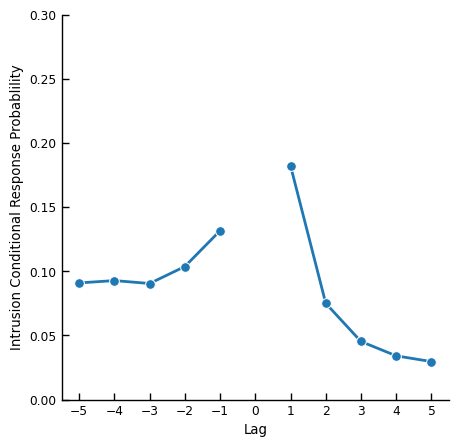

In [68]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_ILI.pdf')
plt.show()